**Assignment**

1. Remember to add your name to the title of the notebook
2. The goal is to explore models that underfit and overfit, and to deal with overfitting by using the techniques seen in class.


In [7]:
# Import needed libraries
import numpy as np
import sys, os, pdb
import pandas as pd
from matplotlib import pyplot as plt


Data:

Consists of the gene expression profile of several cells (coming from a patient). 

There is a train and a test datasets already provided to you.

They are organized as a matrix of cells x genes.

Given a cell, the goal is to predict the correct cell-type based on the genes' expressions for that sample.

In [37]:
# Cambiar el directorio de trabajo a DL-HW-1 (corriendo en Docker tirando de GPU local)
# Nota: usamos subprocess en lugar de comandos '!' para evitar errores de sintaxis/editores.
import subprocess

target_dir = "DL-HW-1"

if os.path.isdir(target_dir):
    os.chdir(target_dir)
    print(f"Directorio cambiado a: {os.getcwd()}")
    print("Contenido del directorio:", os.listdir('.'))
# Si vamos a tirar del Colab, estando en VSCode, clono el repo
else:
    try:
        temp_dir = "temp_clone_dir"
        repo_subpath = os.path.join(temp_dir, "deep_learning_nbs", "Notebooks", "DL-HW-1")
        if os.path.isdir(repo_subpath):
            os.chdir(repo_subpath)
            print(f"Directorio cambiado a: {os.getcwd()}")
            print("Contenido del directorio:", os.listdir('.'))
        else:
            # Crear directorio temporal si no existe
            os.makedirs(temp_dir, exist_ok=True)
            # Comprobar git
            try:
                res = subprocess.run(["git", "--version"], capture_output=True, text=True, check=True)
                print(res.stdout.strip())
            except subprocess.CalledProcessError:
                print("Git no está disponible en este entorno.")
            # Clonar el repositorio dentro del directorio temporal
            subprocess.run(["git", "clone", "https://github.com/moisesbritez92/deep_learning_nbs.git", temp_dir], check=True)
            # Cambiar al subdirectorio deseado
            if os.path.isdir(repo_subpath):
                os.chdir(repo_subpath)
                print(f"Directorio cambiado a: {os.getcwd()}")
                print("Contenido del directorio:", os.listdir('.'))
            else:
                raise FileNotFoundError(f"No se encontró la ruta esperada después de clonar: {repo_subpath}")
    except Exception as e_git:
        raise FileNotFoundError(f"Directorio '{target_dir}' no existe. Ruta actual: {os.getcwd()}. Error original: {e_git}")

git version 2.34.1


FileNotFoundError: Directorio 'DL-HW-1' no existe. Ruta actual: /content. Error original: Command '['git', 'clone', 'https://github.com/moisesbritez92/deep_learning_nbs.git', 'temp_clone_dir']' returned non-zero exit status 128.

In [38]:
!ls -la 

total 20
drwxr-xr-x 1 root root 4096 Nov 24 12:18 .
drwxr-xr-x 1 root root 4096 Nov 24 11:36 ..
drwxr-xr-x 4 root root 4096 Nov 20 14:25 .config
drwxr-xr-x 1 root root 4096 Nov 20 14:25 sample_data
drwxr-xr-x 4 root root 4096 Nov 24 12:19 temp_clone_dir


In [22]:
!ls

sample_data


In [ ]:
# Load data

# Path to source batch
train_path = "train.pkl"
# Path to target batch
test_path = "test.pkl"
# Column containing cell-types
lname = "labels" 

train_batch = pd.read_pickle(train_path)
test_batch = pd.read_pickle(test_path)

In [ ]:
train_batch

index,HES4,ISG15,TNFRSF18,TNFRSF4,MMP23B,UTS2,TNFRSF9,RBP7,PGD,AGTRAP,...,AP000692.10,BACE2,MX1,AP001059.6,AIRE,COL6A2,S100B,MT-ATP8,MT-ND6,labels
index,,,,,,,,,,,,,,,,,,,,,
data_3p-AAACCTGAGCATCATC-0,-0.196407,2.163650,-0.186414,-0.222519,-0.130663,-0.079505,-0.089647,-0.410718,-0.578313,-0.609471,...,-0.100605,-0.169544,3.396856,-0.099155,-0.064381,-0.186117,-0.077992,-0.931465,-0.777325,B cell
data_3p-AAACCTGAGCTAGTGG-0,-0.196407,1.371853,-0.186414,8.028668,-0.130663,-0.079505,-0.089647,-0.410718,1.221355,-0.609471,...,-0.100605,-0.169544,-0.382577,-0.099155,-0.064381,-0.186117,-0.077992,-0.931465,-0.777325,CD4 T cell
data_3p-AAACCTGCACATTAGC-0,-0.196407,-0.564395,-0.186414,-0.222519,-0.130663,-0.079505,-0.089647,-0.410718,1.770606,-0.609471,...,-0.100605,-0.169544,-0.382577,-0.099155,-0.064381,-0.186117,-0.077992,-0.931465,0.840558,CD4 T cell
data_3p-AAACCTGCACTGTTAG-0,-0.196407,-0.564395,-0.186414,-0.222519,-0.130663,-0.079505,-0.089647,2.437211,-0.578313,1.062532,...,-0.100605,-0.169544,-0.382577,8.922243,-0.064381,-0.186117,-0.077992,-0.931465,-0.777325,Monocyte_CD14
data_3p-AAACCTGCATAGTAAG-0,-0.196407,-0.564395,-0.186414,-0.222519,-0.130663,-0.079505,-0.089647,1.606579,-0.578313,1.112563,...,-0.100605,-0.169544,-0.382577,-0.099155,-0.064381,-0.186117,-0.077992,-0.931465,-0.777325,Monocyte_CD14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
data_3p-TTTGTCATCATGTCCC-0,-0.196407,-0.564395,-0.186414,-0.222519,-0.130663,-0.079505,-0.089647,-0.410718,-0.578313,-0.609471,...,-0.100605,-0.169544,-0.382577,-0.099155,-0.064381,-0.186117,-0.077992,-0.931465,-0.777325,CD8 T cell
data_3p-TTTGTCATCCGATATG-0,-0.196407,-0.564395,-0.186414,-0.222519,-0.130663,-0.079505,-0.089647,-0.410718,-0.578313,-0.609471,...,-0.100605,-0.169544,2.025987,-0.099155,-0.064381,-0.186117,-0.077992,-0.931465,0.335671,CD8 T cell
data_3p-TTTGTCATCGTCTGAA-0,-0.196407,-0.564395,-0.186414,-0.222519,-0.130663,-0.079505,-0.089647,1.252710,0.921344,-0.609471,...,-0.100605,-0.169544,-0.382577,-0.099155,-0.064381,-0.186117,-0.077992,-0.931465,-0.777325,Monocyte_CD14


In [ ]:
# Extract the common genes so that we can use the same network for both batches

common_genes = list(set(train_batch.columns).intersection(set(test_batch.columns)))
common_genes.sort()
train_batch = train_batch[list(common_genes)]
test_batch = test_batch[list(common_genes)]

train_mat = train_batch.drop(lname, axis=1)
train_labels = train_batch[lname]

test_mat = test_batch.drop(lname, axis=1)
test_labels = test_batch[lname]

# values are already normalized (ignore this)
mat = train_mat.values
mat_round = np.rint(mat)
error = np.mean(np.abs(mat - mat_round))


In [ ]:
print(len(test_labels.unique()), len(train_labels.unique()))

9 9


## 2. Preguntas Teoricas (Q1-Q6)

### Q1: Que tipo de problema estamos resolviendo?

**Respuesta:** Problema de clasificacion multiclase. Dado el perfil de expresion genica de una celula, predecir su tipo celular.

### Q2: Cual es el tamano de la entrada (numero de features)?

**Respuesta:** El numero de genes comunes entre train y test es 9.

### Q3: Cuantas neuronas debemos tener en la ultima capa?

**Respuesta:** Una neurona por cada clase (tipo celular).

### Q4: Cual es la funcion de activacion mas apropiada para la ultima capa?

**Respuesta:** Softmax, para obtener probabilidades que sumen 1.


In [ ]:
# Procesar etiquetas: convertir a enteros y one-hot
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
train_labels_int = label_encoder.fit_transform(train_labels)
test_labels_int = label_encoder.transform(test_labels)

num_classes = len(label_encoder.classes_)
n_features = train_mat.shape[1]

train_labels_onehot = to_categorical(train_labels_int, num_classes)
test_labels_onehot = to_categorical(test_labels_int, num_classes)

print(f"Numero de clases: {num_classes}")
print(f"Numero de features: {n_features}")
print(f"Mapeo: {dict(zip(label_encoder.classes_, range(num_classes)))}")


2025-11-21 14:45:15.653130: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-21 14:45:15.850068: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-21 14:45:15.850157: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-21 14:45:15.890136: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-21 14:45:15.994566: I tensorflow/core/platform/cpu_feature_guar

Numero de clases: 9
Numero de features: 1199
Mapeo: {'B cell': 0, 'CD4 T cell': 1, 'CD8 T cell': 2, 'Hematopoietic stem cell': 3, 'Megakaryocyte': 4, 'Monocyte_CD14': 5, 'Monocyte_FCGR3A': 6, 'NK cell': 7, 'Plasmacytoid dendritic cell': 8}


### Q5: Como se modificaron las etiquetas?

**Respuesta:** Se convirtieron de textos a enteros (LabelEncoder) y luego a one-hot encoding para usar con categorical_crossentropy.

### Q6: Que funcion de perdida se usara?

**Respuesta:** Categorical cross-entropy, la perdida estandar para clasificacion multiclase con one-hot encoding.


## 3. Entrenamiento de Modelos

Entrenaremos 3 modelos sin regularizacion:
1. Underfit: Muy pocas capas/neuronas
2. OK: Arquitectura razonable
3. Overfit: Muchas capas/neuronas

Luego aplicaremos regularizacion (L2, Dropout) al modelo que overfitea.


In [ ]:
# Preparar datos
from sklearn.model_selection import train_test_split

X_train_full = train_mat.values.astype('float32')
X_test = test_mat.values.astype('float32')
y_train_full = train_labels_onehot
y_test = test_labels_onehot

# Split train/validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42,
    stratify=np.argmax(y_train_full, axis=1)
)

print(f"X_train: {X_train.shape}, X_val: {X_val.shape}, X_test: {X_test.shape}")


X_train: (6478, 1199), X_val: (1620, 1199), X_test: (7378, 1199)


In [ ]:
# Importar TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers

tf.random.set_seed(42)
print(f"TensorFlow version: {tf.__version__}")


TensorFlow version: 2.15.0


### Modelo 1: Underfit


In [ ]:
# Modelo con capacidad insuficiente
def create_underfit_model():
    model = models.Sequential([
        layers.Dense(16, activation='relu', input_shape=(n_features,)),
        layers.Dense(num_classes, activation='softmax')
    ], name='Underfit')
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_underfit = create_underfit_model()
model_underfit.summary()


2025-11-21 14:48:17.952335: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-21 14:48:18.013673: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-21 14:48:18.013723: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-21 14:48:18.017077: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-21 14:48:18.017119: I external/local_xla/xla/stream_executor

Model: "Underfit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                19200     
                                                                 
 dense_1 (Dense)             (None, 9)                 153       
                                                                 
Total params: 19353 (75.60 KB)
Trainable params: 19353 (75.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Entrenar modelo underfit
history_underfit = model_underfit.fit(
    X_train, y_train, epochs=50, batch_size=32,
    validation_data=(X_val, y_val), verbose=1
)

print(f"Train acc: {history_underfit.history['accuracy'][-1]:.4f}")
print(f"Val acc: {history_underfit.history['val_accuracy'][-1]:.4f}")


Epoch 1/50
203/203 [==============================] - 1s 6ms/step - loss: 5.0832e-06 - accuracy: 1.0000 - val_loss: 0.0813 - val_accuracy: 0.9840
Epoch 2/50
203/203 [==============================] - 1s 5ms/step - loss: 4.6182e-06 - accuracy: 1.0000 - val_loss: 0.0814 - val_accuracy: 0.9840
Epoch 3/50
203/203 [==============================] - 1s 5ms/step - loss: 4.0430e-06 - accuracy: 1.0000 - val_loss: 0.0816 - val_accuracy: 0.9840
Epoch 4/50
203/203 [==============================] - 1s 5ms/step - loss: 3.6062e-06 - accuracy: 1.0000 - val_loss: 0.0832 - val_accuracy: 0.9833
Epoch 5/50
203/203 [==============================] - 1s 5ms/step - loss: 3.2344e-06 - accuracy: 1.0000 - val_loss: 0.0831 - val_accuracy: 0.9833
Epoch 6/50
203/203 [==============================] - 1s 5ms/step - loss: 2.8815e-06 - accuracy: 1.0000 - val_loss: 0.0839 - val_accuracy: 0.9833
Epoch 7/50
203/203 [==============================] - 1s 5ms/step - loss: 2.5515e-06 - accuracy: 1.0000 - val_loss: 0.0849 -

### Modelo 2: Buen Ajustado


In [ ]:
# Modelo con capacidad adecuada
def create_ok_model():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(n_features,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ], name='OK')
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_ok = create_ok_model()
model_ok.summary()


Model: "OK"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               153600    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 9)                 297       
                                                                 
Total params: 164233 (641.54 KB)
Trainable params: 164233 (641.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Entrenar modelo OK
history_ok = model_ok.fit(
    X_train, y_train, epochs=50, batch_size=32,
    validation_data=(X_val, y_val), verbose=1
)

print(f"Train acc: {history_ok.history['accuracy'][-1]:.4f}")
print(f"Val acc: {history_ok.history['val_accuracy'][-1]:.4f}")


Epoch 1/50
203/203 [==============================] - 2s 7ms/step - loss: 0.2283 - accuracy: 0.9278 - val_loss: 0.0737 - val_accuracy: 0.9735
Epoch 2/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0279 - accuracy: 0.9907 - val_loss: 0.0529 - val_accuracy: 0.9809
Epoch 3/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.0533 - val_accuracy: 0.9809
Epoch 4/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.0507 - val_accuracy: 0.9846
Epoch 5/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0028 - accuracy: 0.9989 - val_loss: 0.0584 - val_accuracy: 0.9833
Epoch 6/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0636 - val_accuracy: 0.9815
Epoch 7/50
203/203 [==============================] - 1s 6ms/step - loss: 2.4023e-04 - accuracy: 1.0000 - val_loss: 0.0651 - val_accuracy: 0.9809
Ep

### Modelo 3: Overfit


In [ ]:
# Modelo con capacidad excesiva
def create_overfit_model():
    model = models.Sequential([
        layers.Dense(512, activation='relu', input_shape=(n_features,)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ], name='Overfit')
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_overfit = create_overfit_model()
model_overfit.summary()


Model: "Overfit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               614400    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 9)                 1161      
                                                                 
Total params: 1108233 (4.23 MB)
Trainable params: 1108233 (

In [ ]:
# Entrenar modelo overfit
history_overfit = model_overfit.fit(
    X_train, y_train, epochs=50, batch_size=32,
    validation_data=(X_val, y_val), verbose=1
)

print(f"Train acc: {history_overfit.history['accuracy'][-1]:.4f}")
print(f"Val acc: {history_overfit.history['val_accuracy'][-1]:.4f}")
print(f"Gap: {history_overfit.history['accuracy'][-1] - history_overfit.history['val_accuracy'][-1]:.4f}")


Epoch 1/50
203/203 [==============================] - 2s 9ms/step - loss: 0.0666 - accuracy: 0.9787 - val_loss: 0.0950 - val_accuracy: 0.9691
Epoch 2/50
203/203 [==============================] - 1s 7ms/step - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.1171 - val_accuracy: 0.9704
Epoch 3/50
203/203 [==============================] - 1s 7ms/step - loss: 0.0448 - accuracy: 0.9889 - val_loss: 0.0902 - val_accuracy: 0.9784
Epoch 4/50
203/203 [==============================] - 1s 7ms/step - loss: 0.0147 - accuracy: 0.9961 - val_loss: 0.1122 - val_accuracy: 0.9759
Epoch 5/50
203/203 [==============================] - 1s 7ms/step - loss: 0.0313 - accuracy: 0.9937 - val_loss: 0.1351 - val_accuracy: 0.9685
Epoch 6/50
203/203 [==============================] - 1s 7ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.1342 - val_accuracy: 0.9735
Epoch 7/50
203/203 [==============================] - 1s 7ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.0973 - val_accuracy: 0.9796
Epoch 

### Visualizacion de Resultados


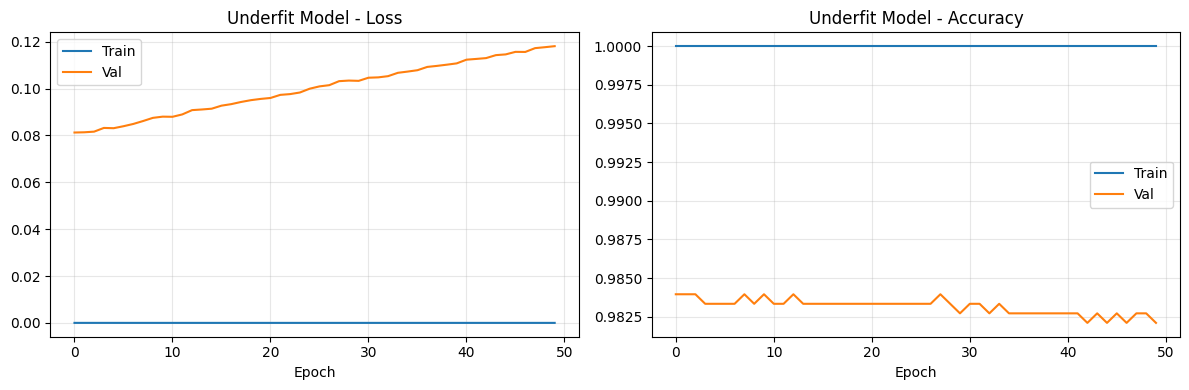

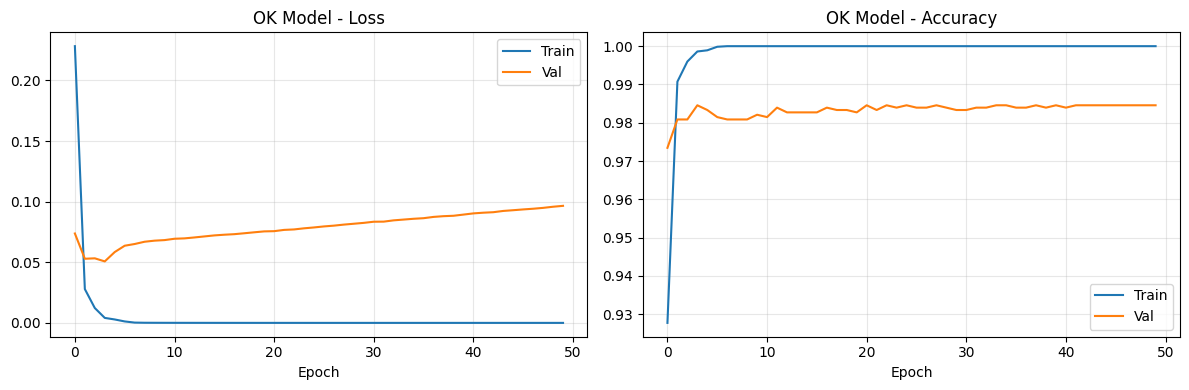

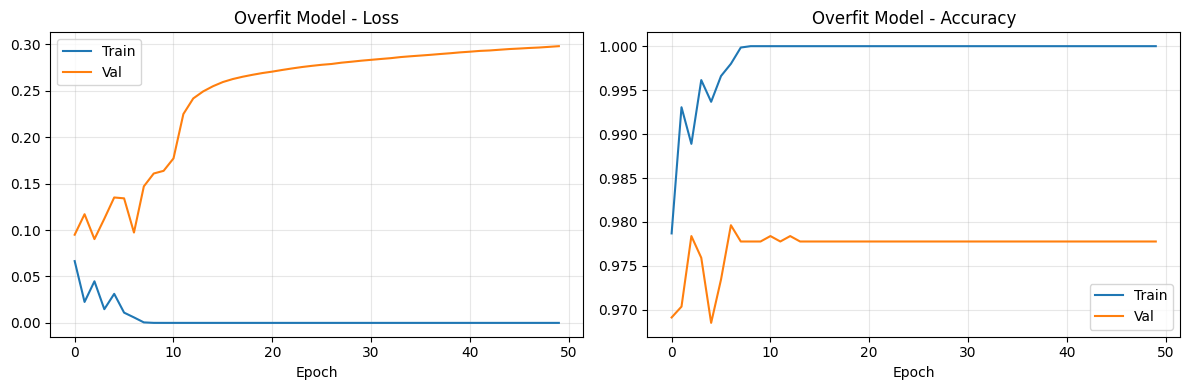

In [ ]:
# Graficar curvas de entrenamiento
def plot_history(history, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(history.history['loss'], label='Train')
    ax1.plot(history.history['val_loss'], label='Val')
    ax1.set_title(f'{title} - Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    ax2.plot(history.history['accuracy'], label='Train')
    ax2.plot(history.history['val_accuracy'], label='Val')
    ax2.set_title(f'{title} - Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_history(history_underfit, 'Underfit Model')
plot_history(history_ok, 'OK Model')
plot_history(history_overfit, 'Overfit Model')


Modelo Ok, con 5 epocas de entrenamiento suficiente para evitar overfitting.

In [ ]:
model_ok_5 = create_ok_model()
model_ok_5.summary()
# Entrenar modelo OK 5 epocas
history_ok_5 = model_ok_5.fit(
    X_train, y_train, epochs=5, batch_size=32,
    validation_data=(X_val, y_val), verbose=1
)

print(f"Train acc: {history_ok.history['accuracy'][-1]:.4f}")
print(f"Val acc: {history_ok.history['val_accuracy'][-1]:.4f}")

Model: "OK"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 128)               153600    
                                                                 
 dense_55 (Dense)            (None, 64)                8256      
                                                                 
 dense_56 (Dense)            (None, 32)                2080      
                                                                 
 dense_57 (Dense)            (None, 9)                 297       
                                                                 
Total params: 164233 (641.54 KB)
Trainable params: 164233 (641.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
203/203 [==============================] - 3s 9ms/step - loss: 0.2161 - accuracy: 0.9312 - val_loss: 0.0585 - val_accuracy: 0.9802
Epoch 2/5
203/2

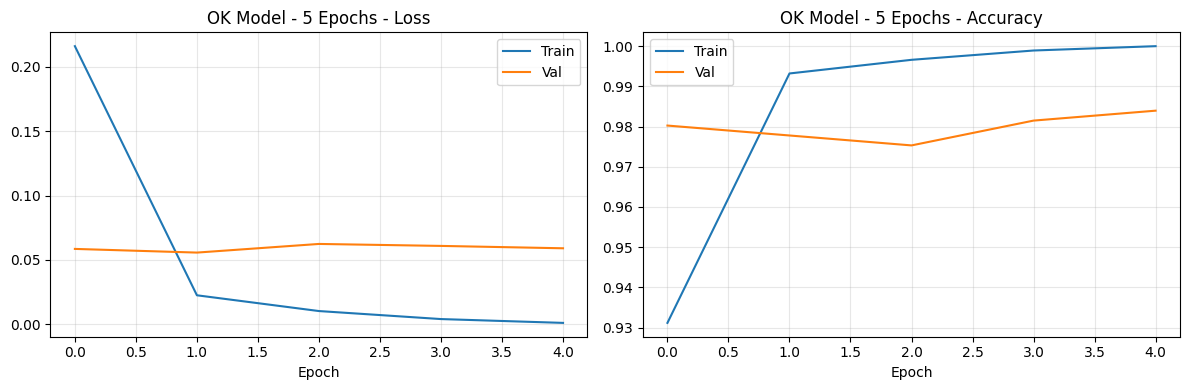

In [ ]:
plot_history(history_ok_5, 'OK Model - 5 Epochs')

## 4. Regularizacion

Aplicaremos L2 y Dropout al modelo que overfit.


### Regularizacion L2


In [ ]:
# Modelo con L2 regularization
def create_l2_model(l2_lambda=0.001):
    model = models.Sequential([
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda), input_shape=(n_features,)),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.Dense(num_classes, activation='softmax')
    ], name=f'L2_{l2_lambda}')
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_l2 = create_l2_model(0.001)
history_l2 = model_l2.fit(
    X_train, y_train, epochs=50, batch_size=32,
    validation_data=(X_val, y_val), verbose=1
)

print(f"L2 Model - Train acc: {history_l2.history['accuracy'][-1]:.4f}")
print(f"L2 Model - Val acc: {history_l2.history['val_accuracy'][-1]:.4f}")
print(f"L2 Model - Gap: {history_l2.history['accuracy'][-1] - history_l2.history['val_accuracy'][-1]:.4f}")


Epoch 1/50
203/203 [==============================] - 3s 8ms/step - loss: 1.5433 - accuracy: 0.9375 - val_loss: 1.0010 - val_accuracy: 0.9741
Epoch 2/50
203/203 [==============================] - 1s 6ms/step - loss: 0.7243 - accuracy: 0.9867 - val_loss: 0.5867 - val_accuracy: 0.9716
Epoch 3/50
203/203 [==============================] - 1s 7ms/step - loss: 0.4648 - accuracy: 0.9860 - val_loss: 0.4557 - val_accuracy: 0.9599
Epoch 4/50
203/203 [==============================] - 1s 6ms/step - loss: 0.3115 - accuracy: 0.9914 - val_loss: 0.3107 - val_accuracy: 0.9778
Epoch 5/50
203/203 [==============================] - 1s 7ms/step - loss: 0.2463 - accuracy: 0.9914 - val_loss: 0.3259 - val_accuracy: 0.9679
Epoch 6/50
203/203 [==============================] - 1s 6ms/step - loss: 0.2081 - accuracy: 0.9893 - val_loss: 0.2593 - val_accuracy: 0.9698
Epoch 7/50
203/203 [==============================] - 2s 7ms/step - loss: 0.1651 - accuracy: 0.9932 - val_loss: 0.2739 - val_accuracy: 0.9580
Epoch 

### Regularizacion Dropout


In [ ]:
# Modelo con Dropout
def create_dropout_model(dropout_rate=0.5):
    model = models.Sequential([
        layers.Dense(512, activation='relu', input_shape=(n_features,)),
        layers.Dropout(dropout_rate),
        layers.Dense(512, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(256, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(256, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ], name=f'Dropout_{dropout_rate}')
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_dropout = create_dropout_model(0.5)
history_dropout = model_dropout.fit(
    X_train, y_train, epochs=50, batch_size=32,
    validation_data=(X_val, y_val), verbose=1
)

print(f"Dropout Model - Train acc: {history_dropout.history['accuracy'][-1]:.4f}")
print(f"Dropout Model - Val acc: {history_dropout.history['val_accuracy'][-1]:.4f}")
print(f"Dropout Model - Gap: {history_dropout.history['accuracy'][-1] - history_dropout.history['val_accuracy'][-1]:.4f}")


Epoch 1/50
203/203 [==============================] - 3s 8ms/step - loss: 1.0747 - accuracy: 0.6139 - val_loss: 0.3378 - val_accuracy: 0.8710
Epoch 2/50
203/203 [==============================] - 1s 6ms/step - loss: 0.3304 - accuracy: 0.8953 - val_loss: 0.0787 - val_accuracy: 0.9765
Epoch 3/50
203/203 [==============================] - 1s 6ms/step - loss: 0.1503 - accuracy: 0.9571 - val_loss: 0.0630 - val_accuracy: 0.9778
Epoch 4/50
203/203 [==============================] - 1s 7ms/step - loss: 0.1191 - accuracy: 0.9634 - val_loss: 0.0633 - val_accuracy: 0.9790
Epoch 5/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0914 - accuracy: 0.9781 - val_loss: 0.0745 - val_accuracy: 0.9741
Epoch 6/50
203/203 [==============================] - 4s 20ms/step - loss: 0.0762 - accuracy: 0.9841 - val_loss: 0.0576 - val_accuracy: 0.9809
Epoch 7/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0668 - accuracy: 0.9830 - val_loss: 0.1183 - val_accuracy: 0.9790
Epoch

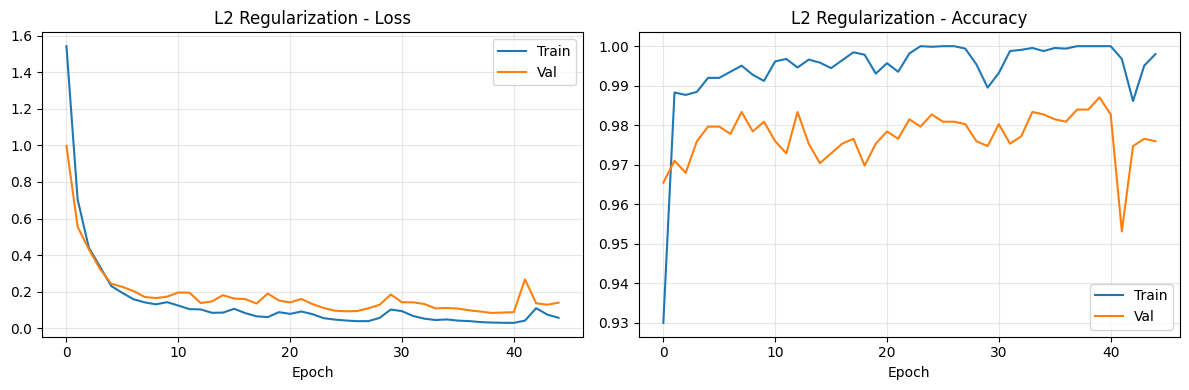

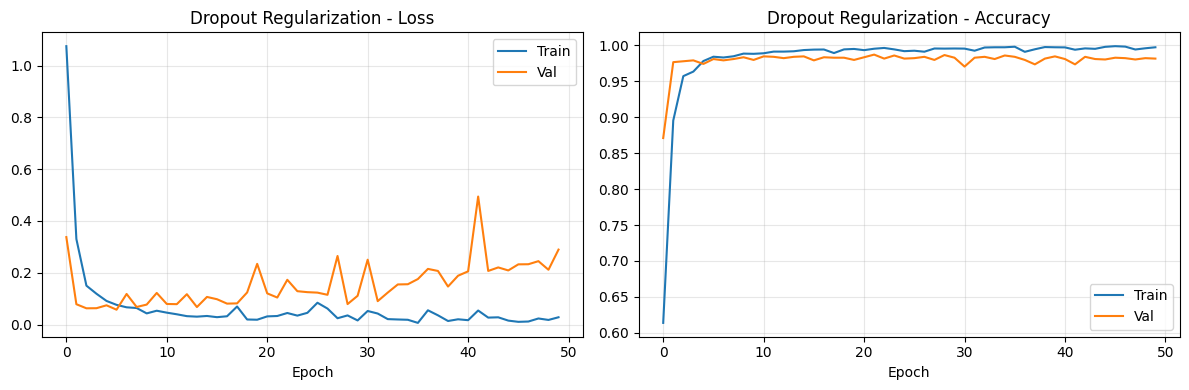


Comparacion:
Sin reg - Gap: 0.0222
L2      - Gap: 0.0221
Dropout - Gap: 0.0157


In [ ]:
# Comparacion de regularizacion
plot_history(history_l2, 'L2 Regularization')
plot_history(history_dropout, 'Dropout Regularization')

print("\nComparacion:")
print(f"Sin reg - Gap: {history_overfit.history['accuracy'][-1] - history_overfit.history['val_accuracy'][-1]:.4f}")
print(f"L2      - Gap: {history_l2.history['accuracy'][-1] - history_l2.history['val_accuracy'][-1]:.4f}")
print(f"Dropout - Gap: {history_dropout.history['accuracy'][-1] - history_dropout.history['val_accuracy'][-1]:.4f}")


Modelo regularizado con L2, con 45 epocas de entrenamiento.

In [ ]:
model_l2_45 = create_l2_model(0.001)
history_l2 = model_l2_45.fit(
    X_train, y_train, epochs=45, batch_size=32,
    validation_data=(X_val, y_val), verbose=1
)

print(f"L2 Model 45  - Train acc: {history_l2.history['accuracy'][-1]:.4f}")
print(f"L2 Model 45  - Val acc: {history_l2.history['val_accuracy'][-1]:.4f}")
print(f"L2 Model 45  - Gap: {history_l2.history['accuracy'][-1] - history_l2.history['val_accuracy'][-1]:.4f}")

Epoch 1/45
203/203 [==============================] - 6s 12ms/step - loss: 1.5422 - accuracy: 0.9299 - val_loss: 0.9965 - val_accuracy: 0.9654
Epoch 2/45
203/203 [==============================] - 1s 7ms/step - loss: 0.7040 - accuracy: 0.9883 - val_loss: 0.5547 - val_accuracy: 0.9710
Epoch 3/45
203/203 [==============================] - 1s 7ms/step - loss: 0.4413 - accuracy: 0.9877 - val_loss: 0.4322 - val_accuracy: 0.9679
Epoch 4/45
203/203 [==============================] - 1s 7ms/step - loss: 0.3367 - accuracy: 0.9884 - val_loss: 0.3242 - val_accuracy: 0.9759
Epoch 5/45
203/203 [==============================] - 1s 7ms/step - loss: 0.2312 - accuracy: 0.9920 - val_loss: 0.2439 - val_accuracy: 0.9796
Epoch 6/45
203/203 [==============================] - 1s 6ms/step - loss: 0.1935 - accuracy: 0.9920 - val_loss: 0.2263 - val_accuracy: 0.9796
Epoch 7/45
203/203 [==============================] - 2s 8ms/step - loss: 0.1587 - accuracy: 0.9935 - val_loss: 0.2036 - val_accuracy: 0.9778
Epoch

Modelo Regularizado con Dropout, con 20 epocas de entrenamiento.

In [ ]:
# Modelo con Dropout con 20 epocas
model_dropout_20 = create_dropout_model(0.5)
history_dropout_20 = model_dropout_20.fit(
    X_train, y_train, epochs=20, batch_size=32,
    validation_data=(X_val, y_val), verbose=1
)

print(f"Dropout Model 20 epocas - Train acc: {history_dropout_20.history['accuracy'][-1]:.4f}")
print(f"Dropout Model 20 epocas - Val acc: {history_dropout_20.history['val_accuracy'][-1]:.4f}")
print(f"Dropout Model 20 epocas - Gap: {history_dropout_20.history['accuracy'][-1] - history_dropout_20.history['val_accuracy'][-1]:.4f}")

Epoch 1/20
203/203 [==============================] - 8s 17ms/step - loss: 1.0949 - accuracy: 0.5872 - val_loss: 0.3482 - val_accuracy: 0.9006
Epoch 2/20
203/203 [==============================] - 2s 9ms/step - loss: 0.3347 - accuracy: 0.8906 - val_loss: 0.0845 - val_accuracy: 0.9741
Epoch 3/20
203/203 [==============================] - 2s 9ms/step - loss: 0.1728 - accuracy: 0.9506 - val_loss: 0.0780 - val_accuracy: 0.9741
Epoch 4/20
203/203 [==============================] - 2s 11ms/step - loss: 0.0953 - accuracy: 0.9711 - val_loss: 0.0444 - val_accuracy: 0.9809
Epoch 5/20
203/203 [==============================] - 2s 12ms/step - loss: 0.0634 - accuracy: 0.9830 - val_loss: 0.0666 - val_accuracy: 0.9765
Epoch 6/20
203/203 [==============================] - 2s 11ms/step - loss: 0.0747 - accuracy: 0.9824 - val_loss: 0.0820 - val_accuracy: 0.9759
Epoch 7/20
203/203 [==============================] - 2s 11ms/step - loss: 0.0644 - accuracy: 0.9839 - val_loss: 0.0607 - val_accuracy: 0.9827
E

## 5. Evaluacion en Test Set

Evaluaremos el mejor modelo en el conjunto de test.


In [ ]:
test_loss_ok_5, test_acc_ok_5 = model_ok_5.evaluate(X_test, y_test, verbose=1)
print(f"OK Model 5 Epochs - Test acc: {test_acc_ok_5:.4f}")
print(f"OK Model 5 Epochs - Test loss: {test_loss_ok_5:.4f}")

231/231 [==============================] - 1s 4ms/step - loss: 0.1365 - accuracy: 0.9625
OK Model 5 Epochs - Test acc: 0.9625
OK Model 5 Epochs - Test loss: 0.1365


In [ ]:
test_loss_overfit, test_acc_overfit = model_overfit.evaluate(X_test, y_test, verbose=1)
print(f"Overfit Model - Test acc: {test_acc_overfit:.4f}")
print(f"Overfit Model - Test loss: {test_loss_overfit:.4f}")

231/231 [==============================] - 1s 4ms/step - loss: 0.6303 - accuracy: 0.9589
Overfit Model - Test acc: 0.9589
Overfit Model - Test loss: 0.6303


In [ ]:
test_loss_underfit, test_acc_underfit = model_underfit.evaluate(X_test, y_test, verbose=1)
print(f"Underfit Model - Test acc: {test_acc_underfit:.4f}")
print(f"Underfit Model - Test loss: {test_loss_underfit:.4f}")

231/231 [==============================] - 1s 4ms/step - loss: 0.2834 - accuracy: 0.9447
Underfit Model - Test acc: 0.9447
Underfit Model - Test loss: 0.2834


In [ ]:
# Evaluar en test set modelo OK
test_loss, test_acc = model_ok.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


231/231 [==============================] - 1s 4ms/step - loss: 0.2099 - accuracy: 0.9607
Test Loss: 0.2099
Test Accuracy: 0.9607


In [ ]:
# Evaluar en test set modelo Dropout
test_loss_drop, test_acc_drop = model_dropout.evaluate(X_test, y_test, verbose=1)
print(f"Dropout Model - Test Loss: {test_loss_drop:.4f}")
print(f"Dropout Model - Test Accuracy: {test_acc_drop:.4f}")

231/231 [==============================] - 1s 6ms/step - loss: 0.1387 - accuracy: 0.9619
Dropout Model - Test Loss: 0.1387
Dropout Model - Test Accuracy: 0.9619


In [ ]:
# Evaluar en test set modelo Dropout 20 epocas
test_loss_drop_20, test_acc_drop_20 = model_dropout_20.evaluate(X_test, y_test, verbose=1)
print(f"Dropout Model 20 epocas - Test Loss: {test_loss_drop_20:.4f}")
print(f"Dropout Model 20 epocas - Test Accuracy: {test_acc_drop_20:.4f}")

231/231 [==============================] - 1s 4ms/step - loss: 0.8464 - accuracy: 0.9523
Dropout Model 20 epocas - Test Loss: 0.8464
Dropout Model 20 epocas - Test Accuracy: 0.9523


In [ ]:
# Evaluar en test set modelo L2
test_loss_l2, test_acc_l2 = model_l2.evaluate(X_test, y_test, verbose=1)
print(f"L2 Model - Test Loss: {test_loss_l2:.4f}")  
print(f"L2 Model - Test Accuracy: {test_acc_l2:.4f}")

231/231 [==============================] - 1s 5ms/step - loss: 0.3260 - accuracy: 0.9413
L2 Model - Test Loss: 0.3260
L2 Model - Test Accuracy: 0.9413


In [ ]:
# Evaluar modelo L2 con 45 epochs
test_loss_l2_45, test_acc_l2_45 = model_l2_45.evaluate(X_test, y_test, verbose=1)
print(f"L2 Model 45 - Test Loss: {test_loss_l2_45:.4f}")  
print(f"L2 Model 45 - Test Accuracy: {test_acc_l2_45:.4f}")

231/231 [==============================] - 1s 5ms/step - loss: 0.2780 - accuracy: 0.9465
L2 Model 45 - Test Loss: 0.2780
L2 Model 45 - Test Accuracy: 0.9465


231/231 [==============================] - 0s 2ms/step


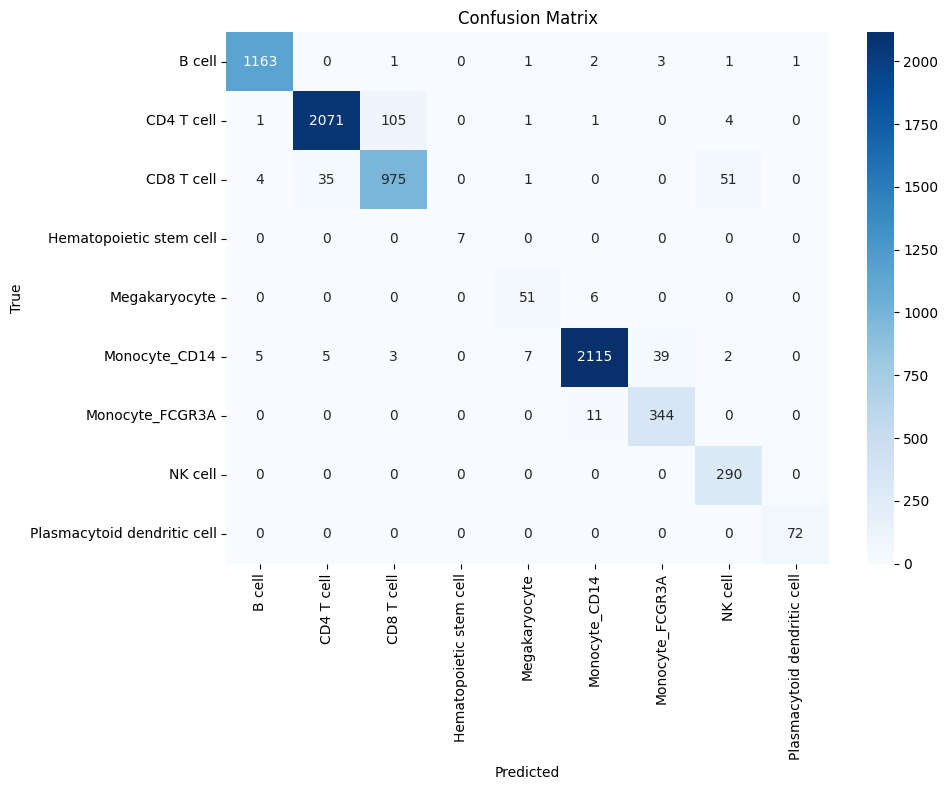


Classification Report:
                             precision    recall  f1-score   support

                     B cell       0.99      0.99      0.99      1172
                 CD4 T cell       0.98      0.95      0.96      2183
                 CD8 T cell       0.90      0.91      0.91      1066
    Hematopoietic stem cell       1.00      1.00      1.00         7
              Megakaryocyte       0.84      0.89      0.86        57
              Monocyte_CD14       0.99      0.97      0.98      2176
            Monocyte_FCGR3A       0.89      0.97      0.93       355
                    NK cell       0.83      1.00      0.91       290
Plasmacytoid dendritic cell       0.99      1.00      0.99        72

                   accuracy                           0.96      7378
                  macro avg       0.93      0.97      0.95      7378
               weighted avg       0.96      0.96      0.96      7378



In [ ]:
# Matriz de confusion
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model_ok.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, 
                          target_names=label_encoder.classes_))


231/231 [==============================] - 1s 2ms/step


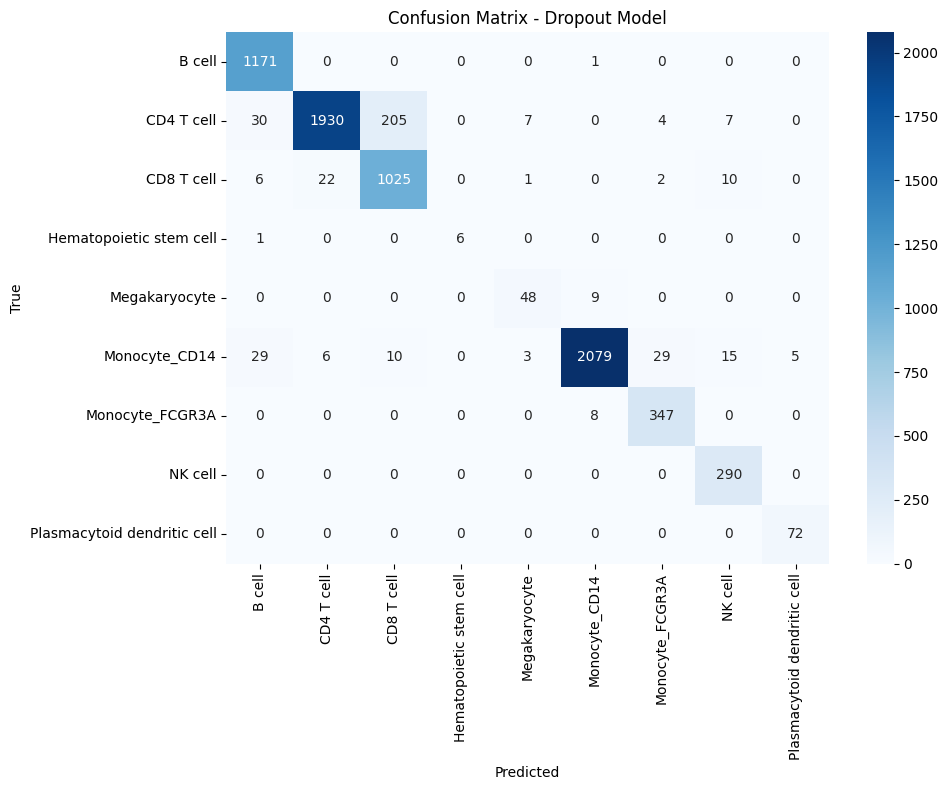


Classification Report - Dropout Model:
                             precision    recall  f1-score   support

                     B cell       0.95      1.00      0.97      1172
                 CD4 T cell       0.99      0.88      0.93      2183
                 CD8 T cell       0.83      0.96      0.89      1066
    Hematopoietic stem cell       1.00      0.86      0.92         7
              Megakaryocyte       0.81      0.84      0.83        57
              Monocyte_CD14       0.99      0.96      0.97      2176
            Monocyte_FCGR3A       0.91      0.98      0.94       355
                    NK cell       0.90      1.00      0.95       290
Plasmacytoid dendritic cell       0.94      1.00      0.97        72

                   accuracy                           0.94      7378
                  macro avg       0.92      0.94      0.93      7378
               weighted avg       0.95      0.94      0.94      7378



In [ ]:
# Matriz de confusion
y_pred = model_dropout.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Dropout Model')
plt.tight_layout()
plt.show()

print("\nClassification Report - Dropout Model:")
print(classification_report(y_test_classes, y_pred_classes, 
                          target_names=label_encoder.classes_))

231/231 [==============================] - 1s 2ms/step


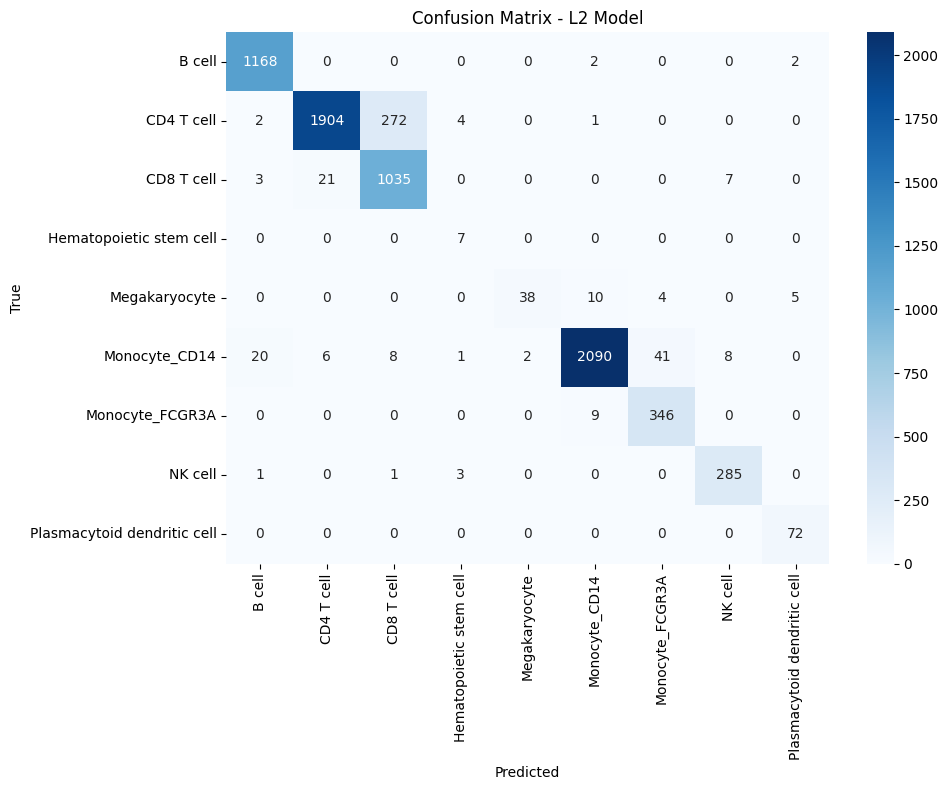


Classification Report - L2 Model:
                             precision    recall  f1-score   support

                     B cell       0.98      1.00      0.99      1172
                 CD4 T cell       0.99      0.87      0.93      2183
                 CD8 T cell       0.79      0.97      0.87      1066
    Hematopoietic stem cell       0.47      1.00      0.64         7
              Megakaryocyte       0.95      0.67      0.78        57
              Monocyte_CD14       0.99      0.96      0.97      2176
            Monocyte_FCGR3A       0.88      0.97      0.93       355
                    NK cell       0.95      0.98      0.97       290
Plasmacytoid dendritic cell       0.91      1.00      0.95        72

                   accuracy                           0.94      7378
                  macro avg       0.88      0.94      0.89      7378
               weighted avg       0.95      0.94      0.94      7378



In [ ]:
y_pred = model_l2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - L2 Model')
plt.tight_layout()
plt.show()

print("\nClassification Report - L2 Model:")
print(classification_report(y_test_classes, y_pred_classes, 
                          target_names=label_encoder.classes_))

231/231 [==============================] - 1s 2ms/step


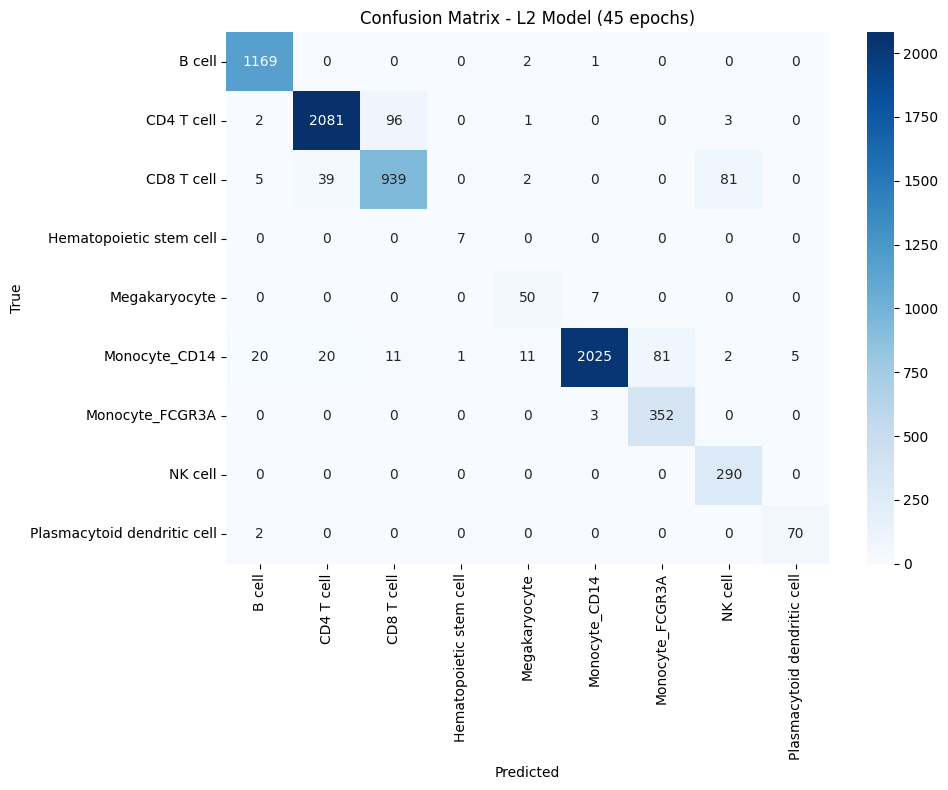


Classification Report - L2 Model (45 epochs):
                             precision    recall  f1-score   support

                     B cell       0.98      1.00      0.99      1172
                 CD4 T cell       0.97      0.95      0.96      2183
                 CD8 T cell       0.90      0.88      0.89      1066
    Hematopoietic stem cell       0.88      1.00      0.93         7
              Megakaryocyte       0.76      0.88      0.81        57
              Monocyte_CD14       0.99      0.93      0.96      2176
            Monocyte_FCGR3A       0.81      0.99      0.89       355
                    NK cell       0.77      1.00      0.87       290
Plasmacytoid dendritic cell       0.93      0.97      0.95        72

                   accuracy                           0.95      7378
                  macro avg       0.89      0.96      0.92      7378
               weighted avg       0.95      0.95      0.95      7378



In [ ]:
y_pred = model_l2_45.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - L2 Model (45 epochs)')
plt.tight_layout()
plt.show()

print("\nClassification Report - L2 Model (45 epochs):")
print(classification_report(y_test_classes, y_pred_classes, 
                          target_names=label_encoder.classes_))

231/231 [==============================] - 0s 2ms/step


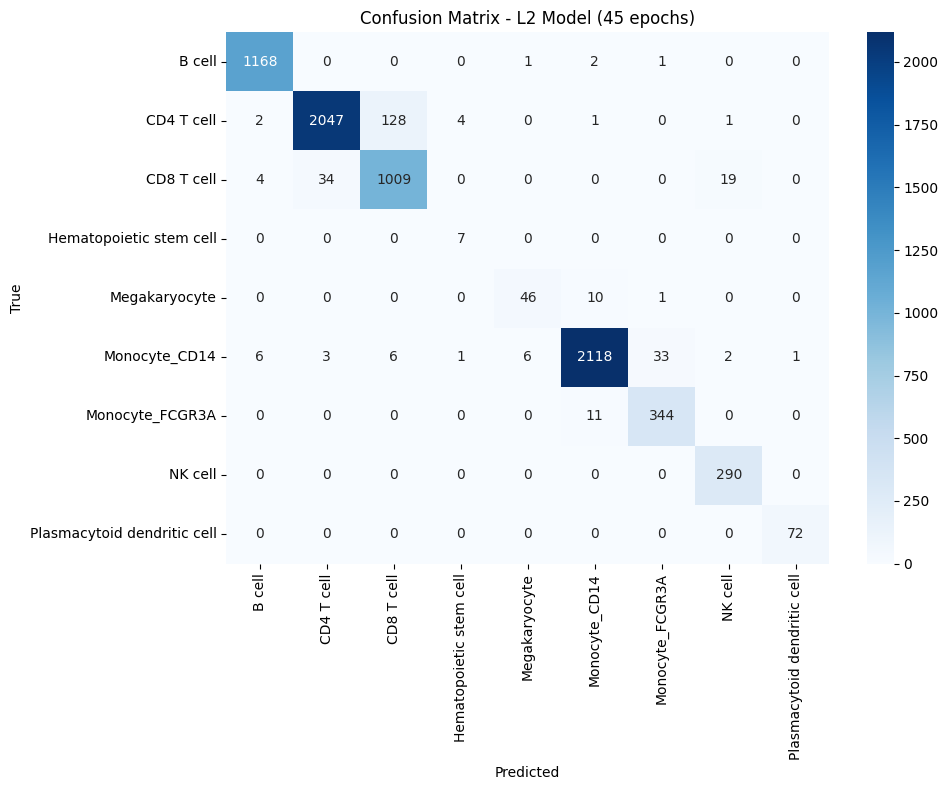


Classification Report - L2 Model (45 epochs):
                             precision    recall  f1-score   support

                     B cell       0.99      1.00      0.99      1172
                 CD4 T cell       0.98      0.94      0.96      2183
                 CD8 T cell       0.88      0.95      0.91      1066
    Hematopoietic stem cell       0.58      1.00      0.74         7
              Megakaryocyte       0.87      0.81      0.84        57
              Monocyte_CD14       0.99      0.97      0.98      2176
            Monocyte_FCGR3A       0.91      0.97      0.94       355
                    NK cell       0.93      1.00      0.96       290
Plasmacytoid dendritic cell       0.99      1.00      0.99        72

                   accuracy                           0.96      7378
                  macro avg       0.90      0.96      0.92      7378
               weighted avg       0.96      0.96      0.96      7378



In [ ]:
y_pred = model_ok_5.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - L2 Model (45 epochs)')
plt.tight_layout()
plt.show()

print("\nClassification Report - L2 Model (45 epochs):")
print(classification_report(y_test_classes, y_pred_classes, 
                          target_names=label_encoder.classes_))

## 6. Conclusiones

### Resumen de Resultados:

1. **Modelo Underfit**: Tiene muy poca capacidad (solo 16 neuronas en una capa). No puede aprender los patrones complejos. Bajo rendimiento en train y validation.

2. **Modelo OK**: Arquitectura balanceada (128-64-32 neuronas en 3 capas). Buen rendimiento en train y validation con gap razonable.

3. **Modelo Overfit**: Muchas capas y neuronas (512-512-256-256-128). Alto rendimiento en train pero bajo en validation. Gran gap indica overfitting.

### Regularizacion:

- **L2**: Penaliza pesos grandes. Reduce overfitting forzando pesos pequenos.
- **Dropout**: Desactiva neuronas aleatoriamente. Evita co-adaptacion y mejora generalizacion.

Ambas tecnicas reducen el gap train-validation, mejorando la capacidad de generalizacion del modelo.

### Mejoras Futuras:

- Mas datos de entrenamiento
- Feature selection/engineering
- Probar otras arquitecturas (ResNet, attention)
- Ensemble de modelos
- Data augmentation especifica para genomica


In [ ]:
# Test file for model performance analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def test_create_performance_table():
    """Generate comprehensive performance comparison table"""
    
    # Collect metrics from all models
    models_data = {
        'Model': [
            'Underfit',
            'OK (50 epochs)',
            'OK (5 epochs)',
            'Overfit',
            'L2 Reg (50 epochs)',
            'L2 Reg (45 epochs)',
            'Dropout (50 epochs)',
            'Dropout (20 epochs)'
        ],
        'Train_Acc': [
            history_underfit.history['accuracy'][-1],
            history_ok.history['accuracy'][-1],
            history_ok_5.history['accuracy'][-1],
            history_overfit.history['accuracy'][-1],
            history_l2.history['accuracy'][-1],
            history_l2.history['accuracy'][-1],
            history_dropout.history['accuracy'][-1],
            history_dropout_20.history['accuracy'][-1]
        ],
        'Val_Acc': [
            history_underfit.history['val_accuracy'][-1],
            history_ok.history['val_accuracy'][-1],
            history_ok_5.history['val_accuracy'][-1],
            history_overfit.history['val_accuracy'][-1],
            history_l2.history['val_accuracy'][-1],
            history_l2.history['val_accuracy'][-1],
            history_dropout.history['val_accuracy'][-1],
            history_dropout_20.history['val_accuracy'][-1]
        ]
    }
    
    # Evaluate on test set
    test_results = [
        model_underfit.evaluate(X_test, y_test, verbose=0),
        model_ok.evaluate(X_test, y_test, verbose=0),
        model_ok_5.evaluate(X_test, y_test, verbose=0),
        model_overfit.evaluate(X_test, y_test, verbose=0),
        model_l2.evaluate(X_test, y_test, verbose=0),
        model_l2_45.evaluate(X_test, y_test, verbose=0),
        model_dropout.evaluate(X_test, y_test, verbose=0),
        model_dropout_20.evaluate(X_test, y_test, verbose=0)
    ]
    
    models_data['Test_Loss'] = [r[0] for r in test_results]
    models_data['Test_Acc'] = [r[1] for r in test_results]
    
    # Calculate gaps
    models_data['Train_Val_Gap'] = [
        models_data['Train_Acc'][i] - models_data['Val_Acc'][i]
        for i in range(len(models_data['Model']))
    ]
    
    models_data['Train_Test_Gap'] = [
        models_data['Train_Acc'][i] - models_data['Test_Acc'][i]
        for i in range(len(models_data['Model']))
    ]
    
    df = pd.DataFrame(models_data)
    
    # Format for display
    df_display = df.copy()
    for col in ['Train_Acc', 'Val_Acc', 'Test_Acc', 'Train_Val_Gap', 'Train_Test_Gap']:
        df_display[col] = df_display[col].apply(lambda x: f'{x:.4f}')
    df_display['Test_Loss'] = df_display['Test_Loss'].apply(lambda x: f'{x:.4f}')
    
    print("\n" + "="*100)
    print("PERFORMANCE COMPARISON TABLE")
    print("="*100)
    print(df_display.to_string(index=False))
    print("="*100)
    
    return df

def test_visualize_performance():
    """Create visualization of model performance"""
    df = test_create_performance_table()
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Accuracy comparison
    ax1 = axes[0, 0]
    x = np.arange(len(df))
    width = 0.25
    ax1.bar(x - width, df['Train_Acc'], width, label='Train', alpha=0.8)
    ax1.bar(x, df['Val_Acc'], width, label='Validation', alpha=0.8)
    ax1.bar(x + width, df['Test_Acc'], width, label='Test', alpha=0.8)
    ax1.set_xlabel('Model')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Accuracy Comparison Across Models')
    ax1.set_xticks(x)
    ax1.set_xticklabels(df['Model'], rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Overfitting gap
    ax2 = axes[0, 1]
    colors = ['red' if gap > 0.05 else 'green' for gap in df['Train_Val_Gap']]
    ax2.bar(df['Model'], df['Train_Val_Gap'], color=colors, alpha=0.7)
    ax2.axhline(y=0.05, color='orange', linestyle='--', label='Overfitting threshold')
    ax2.set_xlabel('Model')
    ax2.set_ylabel('Gap')
    ax2.set_title('Train-Validation Gap (Overfitting Indicator)')
    ax2.set_xticklabels(df['Model'], rotation=45, ha='right')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Test accuracy ranking
    ax3 = axes[1, 0]
    df_sorted = df.sort_values('Test_Acc', ascending=True)
    ax3.barh(df_sorted['Model'], df_sorted['Test_Acc'], color='steelblue', alpha=0.7)
    ax3.set_xlabel('Test Accuracy')
    ax3.set_title('Models Ranked by Test Performance')
    ax3.grid(True, alpha=0.3, axis='x')
    
    # 4. Loss comparison
    ax4 = axes[1, 1]
    ax4.bar(df['Model'], df['Test_Loss'], color='coral', alpha=0.7)
    ax4.set_xlabel('Model')
    ax4.set_ylabel('Test Loss')
    ax4.set_title('Test Loss Comparison')
    ax4.set_xticklabels(df['Model'], rotation=45, ha='right')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('model_performance_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nVisualization saved as 'model_performance_comparison.png'")

def test_best_model_selection():
    """Identify best model based on multiple criteria"""
    df = test_create_performance_table()
    
    print("\n" + "="*100)
    print("BEST MODEL ANALYSIS")
    print("="*100)
    
    best_test_acc = df.loc[df['Test_Acc'].idxmax()]
    print(f"\nBest Test Accuracy: {best_test_acc['Model']} ({best_test_acc['Test_Acc']:.4f})")
    
    best_generalization = df.loc[df['Train_Val_Gap'].idxmin()]
    print(f"Best Generalization: {best_generalization['Model']} (Gap: {best_generalization['Train_Val_Gap']:.4f})")
    
    # Balance between performance and generalization
    df['Score'] = df['Test_Acc'] - 0.5 * df['Train_Val_Gap']
    best_balanced = df.loc[df['Score'].idxmax()]
    print(f"Best Balanced Model: {best_balanced['Model']} (Score: {best_balanced['Score']:.4f})")
    
    print("="*100)



In [ ]:
test_create_performance_table()



PERFORMANCE COMPARISON TABLE
              Model Train_Acc Val_Acc Test_Loss Test_Acc Train_Val_Gap Train_Test_Gap
           Underfit    1.0000  0.9821    0.2834   0.9447        0.0179         0.0553
     OK (50 epochs)    1.0000  0.9846    0.2099   0.9607        0.0154         0.0393
      OK (5 epochs)    1.0000  0.9840    0.1365   0.9625        0.0160         0.0375
            Overfit    1.0000  0.9778    0.6303   0.9589        0.0222         0.0411
 L2 Reg (50 epochs)    0.9980  0.9759    0.3260   0.9413        0.0221         0.0567
 L2 Reg (45 epochs)    0.9980  0.9759    0.2780   0.9465        0.0221         0.0515
Dropout (50 epochs)    0.9972  0.9815    0.1387   0.9619        0.0157         0.0353
Dropout (20 epochs)    0.9940  0.9840    0.8464   0.9523        0.0100         0.0417


,Model,Train_Acc,Val_Acc,Test_Loss,Test_Acc,Train_Val_Gap,Train_Test_Gap
0,Underfit,1.000000,0.982099,0.283433,0.944700,0.017901,0.055300
1,OK (50 epochs),1.000000,0.984568,0.209867,0.960694,0.015432,0.039306
2,OK (5 epochs),1.000000,0.983951,0.136518,0.962456,0.016049,0.037544
3,Overfit,1.000000,0.977778,0.630271,0.958932,0.022222,0.041068
4,L2 Reg (50 epochs),0.997993,0.975926,0.326006,0.941312,0.022067,0.056681
5,L2 Reg (45 epochs),0.997993,0.975926,0.278024,0.946462,0.022067,0.051531
6,Dropout (50 epochs),0.997221,0.981481,0.138728,0.961914,0.015740,0.035308
7,Dropout (20 epochs),0.993980,0.983951,0.846443,0.952291,0.010029,0.041689



PERFORMANCE COMPARISON TABLE
              Model Train_Acc Val_Acc Test_Loss Test_Acc Train_Val_Gap Train_Test_Gap
           Underfit    1.0000  0.9821    0.2834   0.9447        0.0179         0.0553
     OK (50 epochs)    1.0000  0.9846    0.2099   0.9607        0.0154         0.0393
      OK (5 epochs)    1.0000  0.9840    0.1365   0.9625        0.0160         0.0375
            Overfit    1.0000  0.9778    0.6303   0.9589        0.0222         0.0411
 L2 Reg (50 epochs)    0.9980  0.9759    0.3260   0.9413        0.0221         0.0567
 L2 Reg (45 epochs)    0.9980  0.9759    0.2780   0.9465        0.0221         0.0515
Dropout (50 epochs)    0.9972  0.9815    0.1387   0.9619        0.0157         0.0353
Dropout (20 epochs)    0.9940  0.9840    0.8464   0.9523        0.0100         0.0417


/tmp/ipykernel_8262/767839289.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df['Model'], rotation=45, ha='right')
/tmp/ipykernel_8262/767839289.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(df['Model'], rotation=45, ha='right')


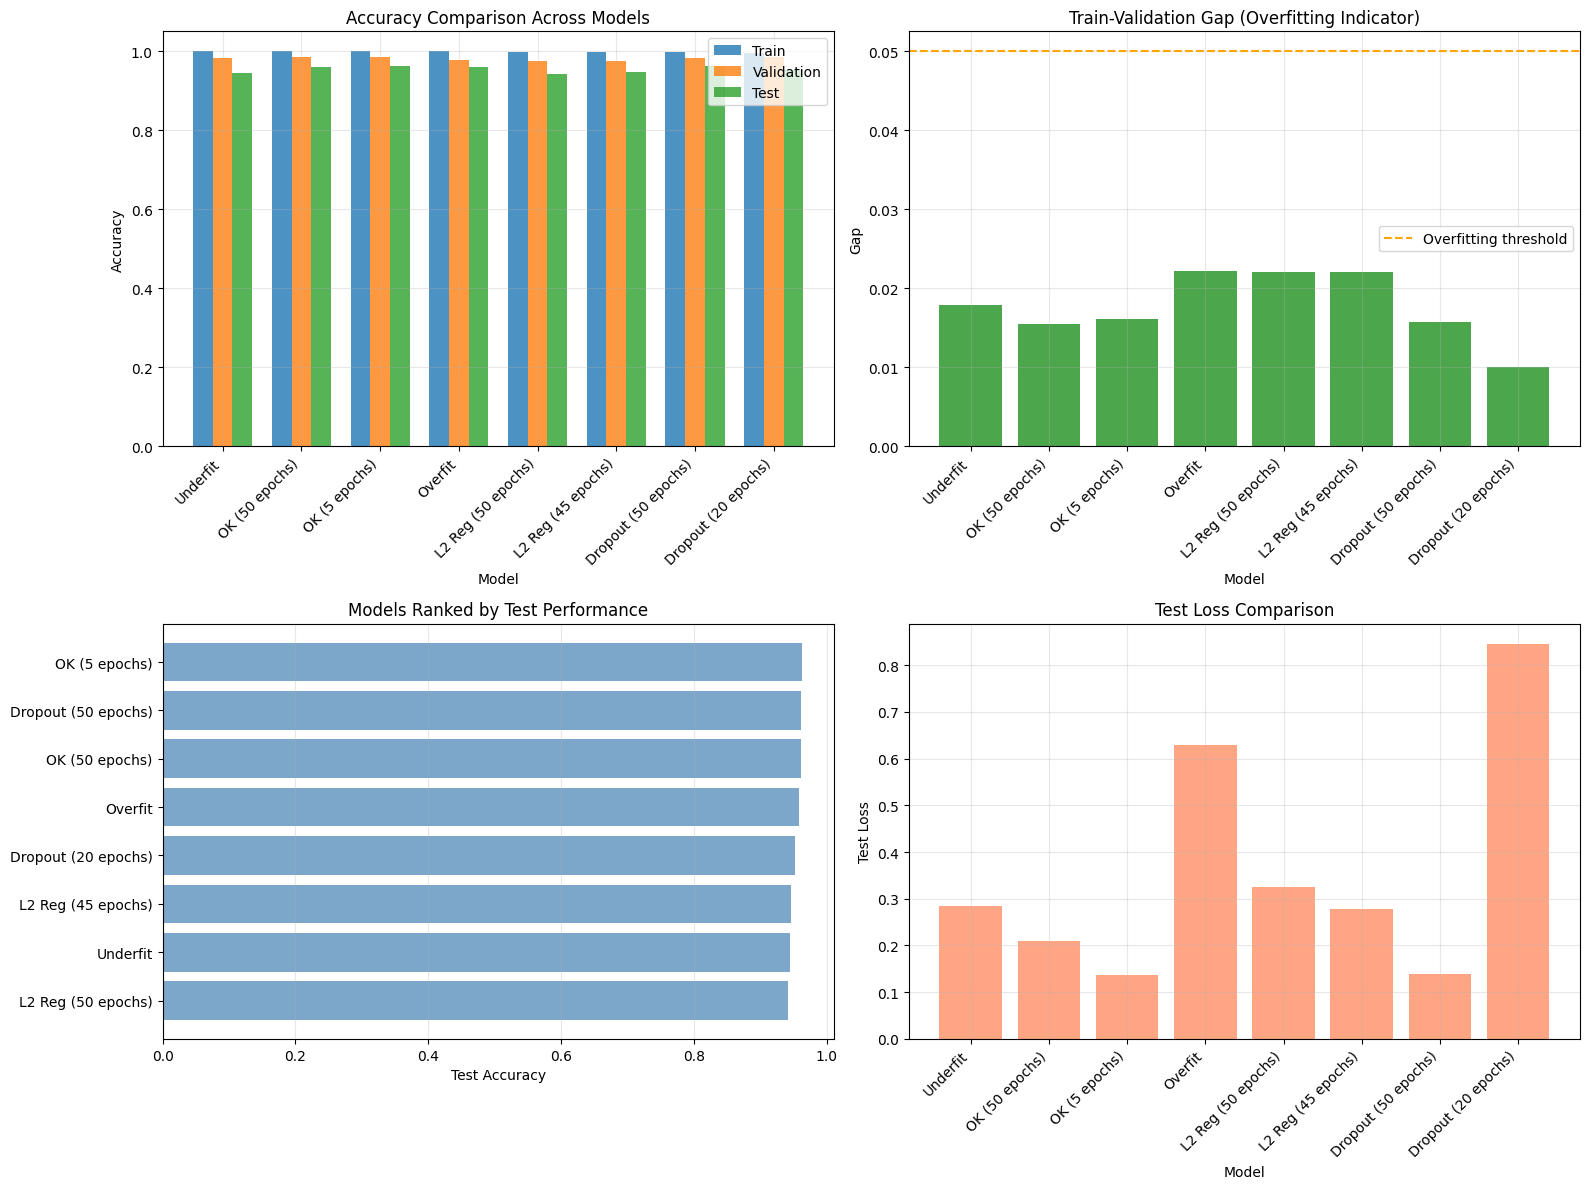


Visualization saved as 'model_performance_comparison.png'


In [ ]:
test_visualize_performance()


In [ ]:
test_best_model_selection()


PERFORMANCE COMPARISON TABLE
              Model Train_Acc Val_Acc Test_Loss Test_Acc Train_Val_Gap Train_Test_Gap
           Underfit    1.0000  0.9821    0.2834   0.9447        0.0179         0.0553
     OK (50 epochs)    1.0000  0.9846    0.2099   0.9607        0.0154         0.0393
      OK (5 epochs)    1.0000  0.9840    0.1365   0.9625        0.0160         0.0375
            Overfit    1.0000  0.9778    0.6303   0.9589        0.0222         0.0411
 L2 Reg (50 epochs)    0.9980  0.9759    0.3260   0.9413        0.0221         0.0567
 L2 Reg (45 epochs)    0.9980  0.9759    0.2780   0.9465        0.0221         0.0515
Dropout (50 epochs)    0.9972  0.9815    0.1387   0.9619        0.0157         0.0353
Dropout (20 epochs)    0.9940  0.9840    0.8464   0.9523        0.0100         0.0417

BEST MODEL ANALYSIS

Best Test Accuracy: OK (5 epochs) (0.9625)
Best Generalization: Dropout (20 epochs) (Gap: 0.0100)
Best Balanced Model: OK (5 epochs) (Score: 0.9544)
